## Визуализация данных об оттоке клиентов банка

# Импорт библиотек

In [71]:
!pip install -U kaleido
!pip install plotly==5.3.1

import pandas as pd
import numpy as np

import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image

from google.colab import drive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Загрузка данных

In [8]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
churn_data = pd.read_csv('/content/drive/MyDrive/SkillFactory/datasets/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Подготовка данных

In [10]:
# Удаляем ненужный столбец и выводим первые 5 строк
churn_data = churn_data.drop('RowNumber', axis = 1)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# С помощью Lambda-функций добавляем два столбца с понятными данными
churn_data['IsActiveMember_Text'] = churn_data['IsActiveMember'].apply(lambda x: 'Неактивный' if x == 0 else 'Активный') 
churn_data['Exited_Text'] = churn_data['Exited'].apply(lambda x: 'Лояльный' if x == 0 else 'Ушедший')
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,IsActiveMember_Text,Exited_Text
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Активный,Ушедший
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Активный,Лояльный
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Неактивный,Ушедший
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Неактивный,Лояльный
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Активный,Лояльный


# Задача № 1
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [60]:
# Задаём 2 вспомогательных списка
labels = ['Лояльные клиенты', 'Ушедшие клиенты']
colors = ['royalblue', 'darkblue']

fig = go.Figure(data = [go.Pie(labels = labels, values = churn_data['Exited'].value_counts())])
fig.update_traces(textfont_size = 20, marker = dict(colors = colors, line = dict(color = '#ffffff', width = 1)))
fig.update_layout(title_text = 'Соотношение ушедших и лояльных клиентов')

fig.show()

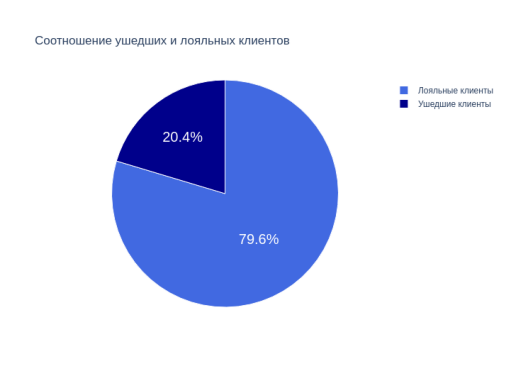

In [61]:
# Выводим сохранённый график на Github
img = Image.open('fig_1.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**Комментарии:**

*   Круговая диаграмма лучше всех отображает данные, которые являются частью одного целого
*   Лояльных клиентов - 79,6% (7'963)
*   Ушедших клиентов - 20,4% (2'037)




# Задача № 2
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2'500 долларов. Опишите распределение и сделайте выводы.

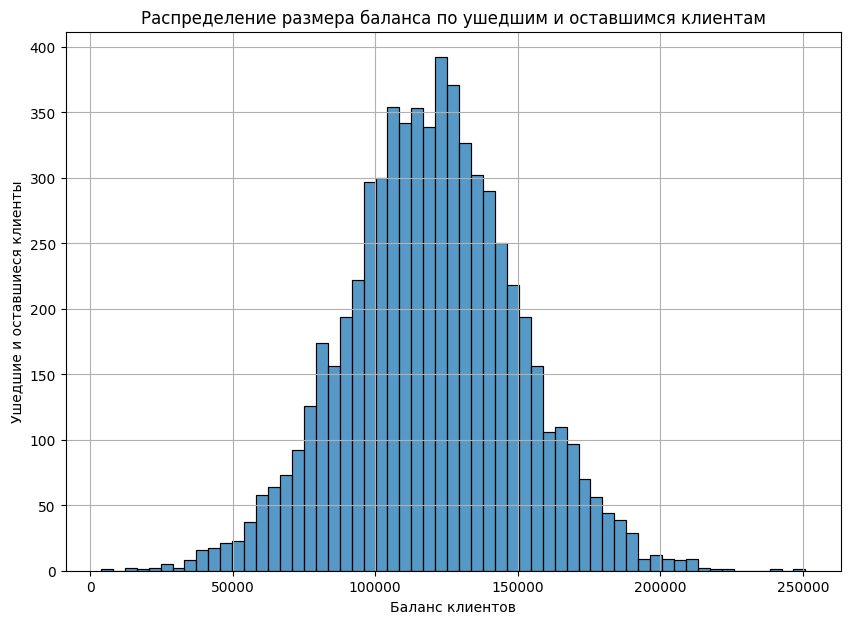

In [13]:
fig = plt.figure(figsize = (10,7))
boxplot = sns.histplot(churn_data[churn_data.Balance > 2500], x = 'Balance')
boxplot.set_title('Распределение размера баланса по ушедшим и оставшимся клиентам');
boxplot.set_xlabel('Баланс клиентов');
boxplot.set_ylabel('Ушедшие и оставшиеся клиенты');

boxplot.grid()

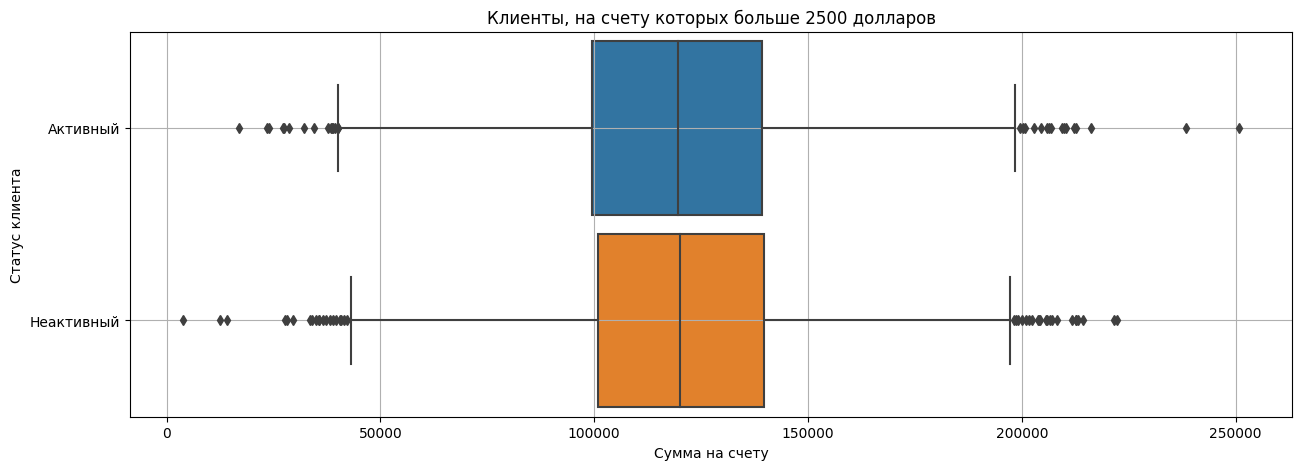

In [14]:
fig = plt.figure(figsize = (15, 5))
boxplot = sns.boxplot(
    data = churn_data[churn_data.Balance > 2500],
    y = 'IsActiveMember_Text',
    x = 'Balance',
    orient = 'h',
    width = 0.9
)

boxplot.set_title('Клиенты, на счету которых больше 2500 долларов');
boxplot.set_xlabel('Сумма на счету');
boxplot.set_ylabel('Статус клиента');
boxplot.grid()

**Комментарии:**

*   Для наглядности отображения распределения выбрана коробчатая диаграмма
*   Медианы находятся примерно в середине диапазона - около 120'000 долларов
*   Выбросы находятся ниже уровня 40'000 долларов и выше уровня 190'000 долларов

**Выводы:**
*   Основная часть клиентов, у которых на счету больше 2'500 долларов, находится в диапазоне от 100'000 до 140'000 долларов
*   Распределение похоже на нормальное

 

# Задача № 3
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

In [62]:
fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(go.Box(y = churn_data.Exited_Text, x = churn_data.Balance, boxpoints = 'all', name = 'Общее распределение клиентов', marker_color = 'royalblue', orientation = 'h'), 1, 1)
fig.add_trace(go.Histogram(y = (churn_data[churn_data.Balance == 0]['Exited_Text']), marker_color = 'royalblue', text = 'кол-во клиентов'), 1, 2)

fig.update_layout(title = {'text': "Распределение баланса по лояльным и ушедшим клиентам и график клиентов с нулевым балансом", 'y': 0.9, 'x': 0.5, 'xanchor': 'center', 'yanchor': 'top'}, showlegend = False)

fig.show()

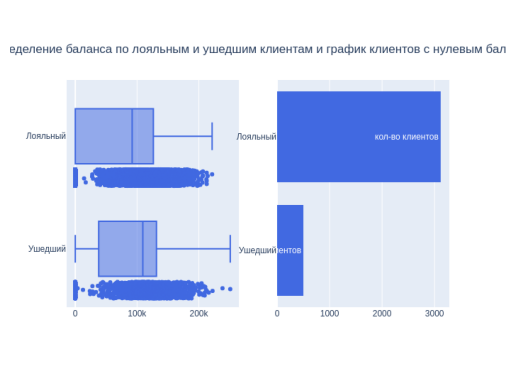

In [63]:
# Выводим сохранённый график на Github
img = Image.open('fig_3.png')
plt.imshow(img)
plt.axis('off')
plt.show()

In [64]:
fig1 = px.histogram(data_frame = churn_data, x = 'Balance', color = 'Exited_Text', histfunc = 'count', title = 'Гистограмма распределения баланса в зависимости от лояльности клиента', nbins = 15)
fig1.show()

fig2 = px.box(data_frame = churn_data, x = 'Balance', color = 'Exited_Text', title = 'Коробчатая диаграмма распределения баланса в зависимости от лояльности клиентов')
fig2.show()

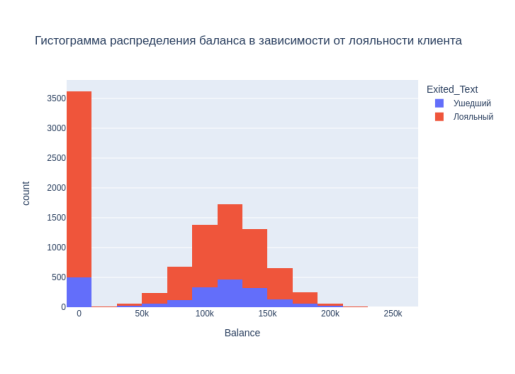

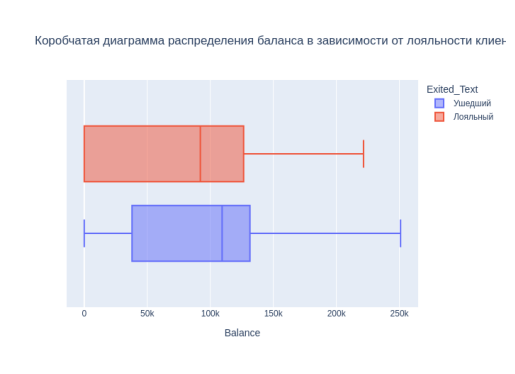

In [65]:
# Выводим сохранённые графики на Github
img = Image.open('fig_3_1.png')
plt.imshow(img)
plt.axis('off')
plt.show()

img = Image.open('fig_3_2.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**Комментарии:**

*   Количество лояльных клиентов с нулевым балансом в несколько раз больше чем количество ушедших клиентов с нулевым балансом
*   Ушедших клиентов могут не устраивать продукты банка или лояльность

# Задача № 4
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

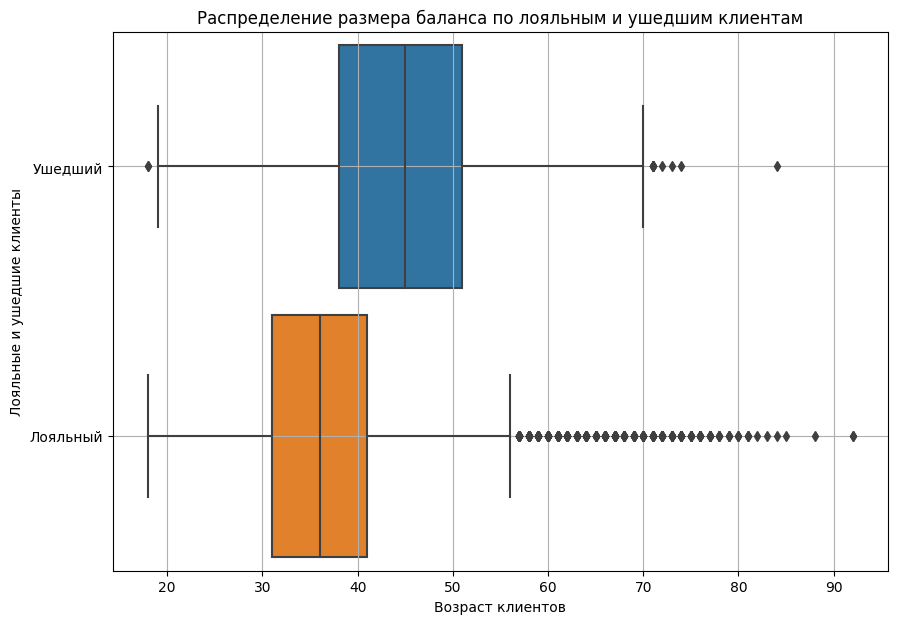

In [17]:
fig = plt.figure(figsize = (10,7))

boxplot = sns.boxplot(data = churn_data, y = 'Exited_Text', x = 'Age', orient = 'h', width = 0.9)

boxplot.set_title('Распределение размера баланса по лояльным и ушедшим клиентам');
boxplot.set_xlabel('Возраст клиентов');
boxplot.set_ylabel('Лояльные и ушедшие клиенты');

boxplot.grid()

**Комментарии:**

*   Потенциальных выбросов больше в группе Лояльных клиентов
*   Руководству банка следует обратить внимание на диапазон 20-30 лет, а также на диапазон 40-58 лет из за низкой лояльности
*   В диапазоне 30-40 лет и так всё неплохо

# Задача № 5
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [54]:
churn_data['IsActiveMember'] = churn_data['Exited']
px.scatter(churn_data, x = 'CreditScore', y = 'EstimatedSalary', color = 'IsActiveMember')

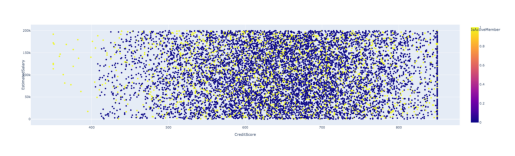

In [55]:
# Выводим сохранённый график на Github
img = Image.open('fig_5.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**Комментарии:**

*   Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты отсутствует
*   Только у ушедших клиентов есть кредитный рейтинг ниже 400

# Задача № 6
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [56]:
bar_data = churn_data.groupby(by = 'Gender', as_index = False)[['Exited']].mean()
bar_data = bar_data.replace({'Gender': {'Male': 'Мужской', 'Female': 'Женский'}})
bar_data.columns = ['Пол','Кол-во ушедших']

fig = px.bar(data_frame = bar_data, y = 'Пол', x = 'Кол-во ушедших', text = 'Пол', orientation = 'h', title = 'Соотношение ушедших мужчин и женщин')

fig.show()

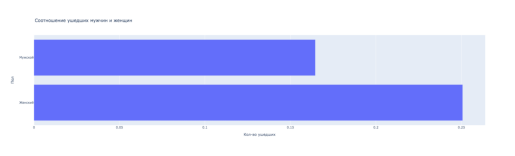

In [57]:
# Выводим сохранённый график на Github
img = Image.open('fig_6.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**Комментарии:**

*   Из данного банка чаше уходят женщины

# Задача № 7
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [58]:
px.histogram(churn_data, x = 'Exited_Text',  color = 'NumOfProducts')

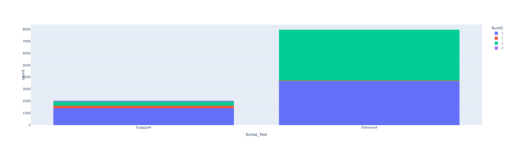

In [59]:
# Выводим сохранённый график на Github
img = Image.open('fig_7.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**Комментарии:**

*   Больше всех уходят обладатели одного продукта
*   Больше всего лояльных клиентов имеют 2 продукта банка

# Задача № 8
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [66]:
fig = make_subplots(rows = 1, cols = 2, specs = [[{'type':'domain'}, {'type':'domain'}]])

fig.add_trace(go.Pie(labels = ['Неактивные клиетны', 'Активные клиенты'], values = churn_data[churn_data.Exited == 1]['IsActiveMember'].value_counts(), hole = 0.4, textinfo = 'label+percent', insidetextorientation = 'radial', 
                     marker = dict(colors = ['blue', 'red'], line = dict(color='#000000', width = 2))), 1, 2)

fig.add_trace(go.Pie(labels = ['Активные клиетны', 'Неактивные клиенты'], values = churn_data[churn_data.Exited == 0]['IsActiveMember'].value_counts(), hole = 0.4, textinfo ='label+percent', insidetextorientation = 'radial', 
                     marker = dict(colors = ['red', 'blue'], line = dict(color='#000000', width = 2))), 1, 1)

fig.update_layout(
    title_text = "Влияние наличия статуса активного клиента на отток клиентов", title_xref = 'paper',
    annotations = [dict(text = 'Лояльные', x = 0.2, y = 0.5, font_size = 16, showarrow = False),
                   dict(text = 'Ушедшие', x = 0.8, y = 0.5, font_size = 16, showarrow = False)], 
                  showlegend = False)

fig.show()

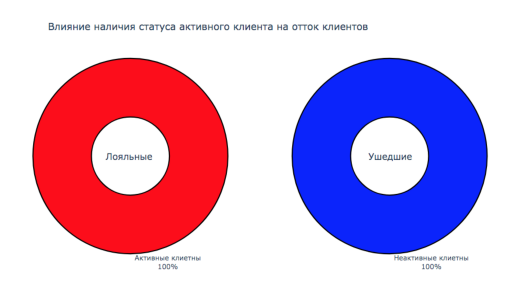

In [67]:
# Выводим сохранённый график на Github
img = Image.open('fig_8.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**Комментарии:**

*   Очевидно что лояльным клиентам не хватает качественных продуктов и лояльности со стороны банка
*   Банку нужно повышать качество продуктов и усовершенствовать программу лояльности

# Задача № 9
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [68]:
churn_countries = pd.DataFrame(dict(churn_data.groupby(['Geography'])[['Exited']].mean()))

fig = px.choropleth(
    data_frame = churn_countries,
    locations = churn_countries.index,
    locationmode = 'country names',
    color = 'Exited',
    range_color = [0, 0.4],
    color_continuous_scale = px.colors.sequential.Plasma, 
    title = 'Доля ушедших клиентов по странам',
    scope = 'europe',
    width = 800, height = 500,
    center = {'lat': 47, 'lon': 2}
)
fig.show()

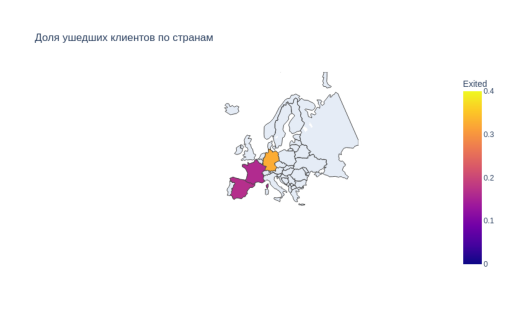

In [69]:
# Выводим сохранённый график на Github
img = Image.open('fig_9.png')
plt.imshow(img)
plt.axis('off')
plt.show()

**Комментарии:**

*   Доля ушедших клиентов в Германии - 32,44%
*   Это в два раза больше чем в Испании и Франции (взятых вместе)
*   Возможно это связано с событиями внутри страны

# Задача № 10
Переведите числовой признак *CreditScore* в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу *CreditScore* и создайте новый признак *CreditScoreCat* — категории кредитного рейтинга.

<Axes: xlabel='Tenure', ylabel='CreditScoreCat'>

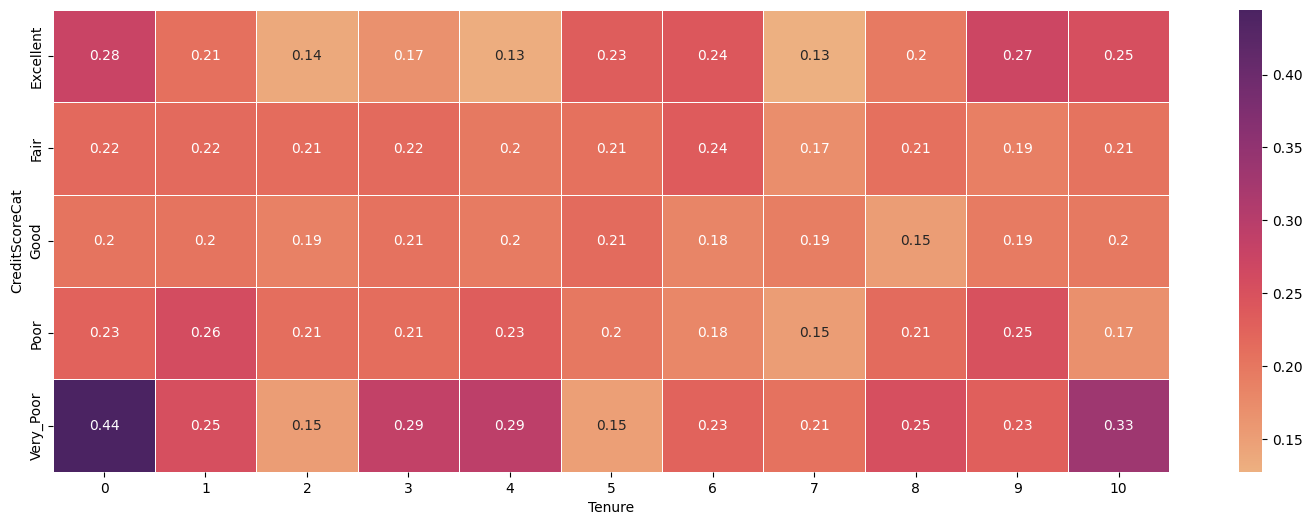

In [70]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return 'Very_Poor'
    elif credit_score >= 500 and credit_score < 601:
        return 'Poor'
    elif credit_score >= 601 and credit_score < 661:
        return 'Fair'
    elif credit_score >= 661 and credit_score < 781:
        return 'Good'
    elif credit_score >= 781 and credit_score < 851:
        return 'Excellent'
    elif credit_score >= 851:
        return 'Top'
    elif credit_score < 300:
        return 'Deep'

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)


fig, ax = plt.subplots(figsize = (18, 6))
sns.heatmap(churn_data.pivot_table(values = 'Exited', index = 'CreditScoreCat', columns = 'Tenure', aggfunc = 'mean'), annot = True, linewidth = 0.5, cmap = 'flare')